In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 50

# Functions

In [3]:
def linreg(X, Y):
    """
        Summary
        Linear regression of y = ax + b
        Usage
        real, real, real = linreg(list, list)
        Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
        """
    if len(X) != len(Y):  raise ValueError("unequal length")
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    a, b = (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det
    meanerror = residual = 0.0
    for x, y in zip(X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
    RR = 1 - residual/meanerror
    ss = residual / (N-2)
    Var_a, Var_b = ss * N / det, ss * Sxx / det
    return a, b, RR, Var_a, Var_b

In [32]:
def plot_scatter(df, predicted, predictor='', title=''):
    if not title:
        title = '%s vs %s' % (predicted, predictor)
    with plt.style.context('bmh'):
        df.plot(x=predictor, 
                y=predicted, 
                figsize=(14, 8), 
                kind='scatter', 
                title=title)

# Read data

In [5]:
project_dir = '/Users/navaneethan/Documents/projects/lighttime/'
raw_dir = project_dir + 'raw/'
processed_dir = project_dir + 'processed/'

fname = '2016_cities_res_com_ind_energy_use_simple.csv'

In [54]:
pd.read_csv(raw_dir+'2016_cities_residential_energy_use_simple.csv').columns.to_list()

['gisjoin',
 'housing_units',
 'total_pop',
 'elec_1kdollars',
 'elec_mwh',
 'gas_1kdollars',
 'gas_mcf',
 'elec_1kdollars_bin_min',
 'elec_1kdollars_bin_max',
 'elec_mwh_bin_min',
 'elec_mwh_bin_max',
 'gas_1kdollars_bin_min',
 'gas_1kdollars_bin_max',
 'gas_mcf_bin_min',
 'gas_mcf_bin_max',
 'elec_lb_ghg',
 'elec_min_lb_ghg',
 'elec_max_lb_ghg',
 'gas_lb_ghg',
 'gas_min_lb_ghg',
 'gas_max_lb_ghg']

In [6]:
res_com_ind = pd.read_csv(processed_dir+fname)

In [7]:
res_com_ind.set_index(keys='gisjoin', inplace=True)

In [49]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [56]:
res_com_ind.sort_values(by='total_pop', ascending=False).head()

,res_gas_mcf,res_gas_1kdollars,res_gas_lb_ghg,housing_units,total_pop,res_elec_lb_ghg,res_elec_mwh,res_elec_1kdollars,com_gas_mcf,com_elec_1kdollars,...,log_com_elec_lb_ghg,log_com_num_establishments,log_com_elec_mwh,log_ind_elec_mwh,log_ind_elec_1kdollars,log_ind_gas_lb_ghg,log_ind_num_establishments,log_ind_elec_lb_ghg,log_ind_gas_mcf,log_ind_gas_1kdollars
gisjoin,,,,,,,,,,,,,,,,,,,,,
G36051000,179425068.0,2089405.0,2.153867e+10,3128246.0,8461961.0,2.228562e+10,14872960.0,3707393.0,9.751826e+07,4.291287e+06,...,10.591015,4.965089,7.415388,6.095348,4.875725,8.813842,4.421209,9.270975,6.734507,4.506828
G06044000,41818846.0,447711.0,5.020047e+09,1355074.0,3918872.0,1.210986e+10,9043891.0,1394316.0,1.488978e+07,1.727121e+06,...,10.206810,4.695911,7.080026,6.359545,5.435843,9.620513,4.383528,9.486329,7.541178,5.373048
G17014000,90027429.0,959029.0,1.080713e+10,1042539.0,2714017.0,1.229448e+10,7211287.0,904214.0,2.855947e+07,5.366015e+05,...,10.020287,4.585303,6.788590,6.642120,5.455633,9.487649,3.936916,9.873817,7.408313,5.109881
G48035000,12930383.0,153065.0,1.552198e+09,829402.0,2240582.0,1.412297e+10,10547389.0,1170275.0,1.342915e+07,8.508526e+05,...,10.132868,4.517011,7.006087,6.997739,5.724295,10.239871,4.168704,10.124520,8.160535,5.583781
G420101060000,33972181.0,458916.0,4.078112e+09,582511.0,1559938.0,8.231817e+09,4271528.0,631594.0,1.274119e+07,2.470246e+05,...,9.671111,4.357477,6.386199,6.301357,5.141562,9.034267,3.526469,9.586269,6.954932,4.824163


In [55]:
res_com_ind.reset_index()['gisjoin'].value_counts(dropna=False)

G48061700        1
G420091045072    1
G01018952        1
G38028980        1
G40042860        1
G45061405        1
G360055063000    1
G55002375        1
G26066640        1
G13012120        1
G38055420        1
G31013295        1
G24025425        1
G01028936        1
G20002175        1
G16053920        1
G06048816        1
G360067059036    1
G18020458        1
G340023069420    1
G18067464        1
G12068875        1
G360117063605    1
G53011825        1
G55009800        1
                ..
G420017045112    1
G420107079120    1
G53014170        1
G27056284        1
G19066315        1
G27004762        1
G17019226        1
G48066884        1
G250021050250    1
G56066220        1
G13075496        1
G55039650        1
G420071021032    1
G420115003496    1
G420125051104    1
G06013945        1
G27007948        1
G27008416        1
G26076460        1
G22000240        1
G420051084344    1
G45036115        1
G420121011080    1
G26050660        1
G51014984        1
Name: gisjoin, Length: 17860, d

In [51]:
res_com_ind['total_pop'].describe(percentiles=np.arange(0, 1, 0.05))

count    1.786000e+04
mean     1.213821e+04
std      8.730862e+04
min      1.000000e+00
0%       1.000000e+00
5%       1.610000e+02
10%      2.670000e+02
15.0%    3.830000e+02
20%      5.070000e+02
25%      6.590000e+02
30.0%    8.277000e+02
35%      1.027650e+03
40%      1.283000e+03
45%      1.596000e+03
50%      1.963000e+03
55.0%    2.488000e+03
60.0%    3.076400e+03
65%      4.032050e+03
70%      5.203000e+03
75%      7.115000e+03
80%      9.806600e+03
85.0%    1.437915e+04
90%      2.285820e+04
95%      4.397445e+04
max      8.461961e+06
Name: total_pop, dtype: float64

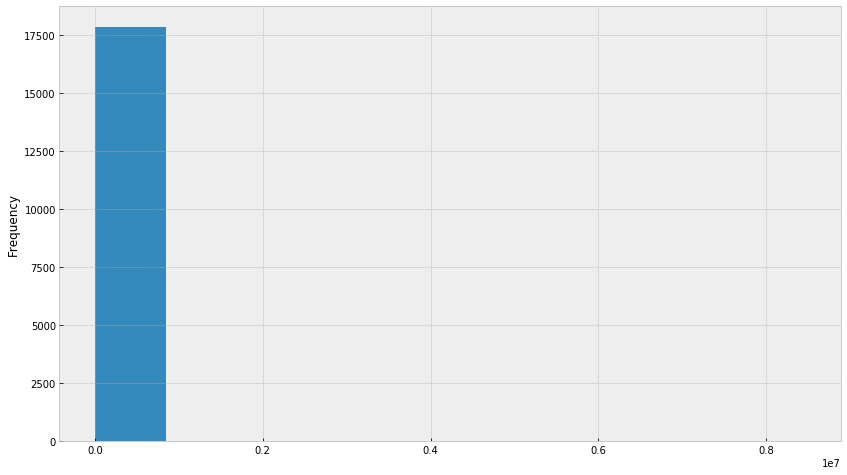

In [42]:
res_com_ind.replace([np.inf, -np.inf], value=np.nan, inplace=True)
res_com_ind.dropna(inplace=True)

with plt.style.context('bmh'):
    res_com_ind['total_pop'].plot(kind='hist', figsize=(14, 8))

In [8]:
res_com_ind.head()

,res_gas_mcf,res_gas_1kdollars,res_gas_lb_ghg,housing_units,total_pop,res_elec_lb_ghg,res_elec_mwh,res_elec_1kdollars,com_gas_mcf,com_elec_1kdollars,...,com_elec_lb_ghg,com_num_establishments,com_elec_mwh,ind_elec_mwh,ind_elec_1kdollars,ind_gas_lb_ghg,ind_num_establishments,ind_elec_lb_ghg,ind_gas_mcf,ind_gas_1kdollars
gisjoin,,,,,,,,,,,,,,,,,,,,,
G12045000,156051.0,3295.0,1.873283e+07,161487.0,432622.0,2.682522e+09,1901135.0,193277.0,1.851831e+06,181201.129798,...,3.099168e+09,8815.0,2.196417e+06,237401.326000,18245.295540,1.762680e+08,2039.0,3.349757e+08,1.468378e+06,8472.540973
G12030000,63025.0,1315.0,7.565683e+06,70352.0,235626.0,1.365389e+09,967667.0,98377.0,3.431148e+05,42295.506399,...,7.233999e+08,3774.0,5.126822e+05,435003.867500,33431.886230,3.229859e+08,1804.0,6.137950e+08,2.690592e+06,15524.715690
G12070675,17096.0,371.0,2.052247e+06,27246.0,63747.0,4.673354e+08,331206.0,33672.0,2.662422e+04,11853.523832,...,2.027364e+08,741.0,1.436817e+05,9131.975132,701.830895,6.780398e+06,185.0,1.288531e+07,5.648322e+04,325.908177
G12016475,31422.0,663.0,3.772000e+06,34790.0,98717.0,7.788154e+08,551956.0,56114.0,5.140588e+05,48074.680868,...,8.222438e+08,1409.0,5.827340e+05,46465.918210,3571.102253,3.450047e+07,664.0,6.556389e+07,2.874016e+05,1658.307485
G12057425,73775.0,1560.0,8.856091e+06,33788.0,90878.0,7.053489e+08,499889.0,50821.0,3.359045e+05,27691.375552,...,4.736186e+08,1672.0,3.356592e+05,38704.086010,2974.572635,2.873739e+07,448.0,5.461187e+07,2.393931e+05,1381.297906


In [9]:
for pc in res_com_ind.columns:
    res_com_ind['log_'+pc] = res_com_ind[pc].apply(lambda col: np.log10(col))

In [10]:
res_com_ind.head()

,res_gas_mcf,res_gas_1kdollars,res_gas_lb_ghg,housing_units,total_pop,res_elec_lb_ghg,res_elec_mwh,res_elec_1kdollars,com_gas_mcf,com_elec_1kdollars,...,log_com_elec_lb_ghg,log_com_num_establishments,log_com_elec_mwh,log_ind_elec_mwh,log_ind_elec_1kdollars,log_ind_gas_lb_ghg,log_ind_num_establishments,log_ind_elec_lb_ghg,log_ind_gas_mcf,log_ind_gas_1kdollars
gisjoin,,,,,,,,,,,,,,,,,,,,,
G12045000,156051.0,3295.0,1.873283e+07,161487.0,432622.0,2.682522e+09,1901135.0,193277.0,1.851831e+06,181201.129798,...,9.491245,3.945222,6.341715,5.375483,4.261151,8.246174,3.309417,8.525013,6.166838,3.928014
G12030000,63025.0,1315.0,7.565683e+06,70352.0,235626.0,1.365389e+09,967667.0,98377.0,3.431148e+05,42295.506399,...,8.859378,3.576802,5.709848,5.638493,4.524161,8.509184,3.256237,8.788023,6.429848,4.191024
G12070675,17096.0,371.0,2.052247e+06,27246.0,63747.0,4.673354e+08,331206.0,33672.0,2.662422e+04,11853.523832,...,8.306932,2.869818,5.157401,3.960565,2.846232,6.831255,2.267172,7.110095,4.751919,2.513095
G12016475,31422.0,663.0,3.772000e+06,34790.0,98717.0,7.788154e+08,551956.0,56114.0,5.140588e+05,48074.680868,...,8.915001,3.148911,5.765470,4.667135,3.552802,7.537825,2.822168,7.816665,5.458489,3.219665
G12057425,73775.0,1560.0,8.856091e+06,33788.0,90878.0,7.053489e+08,499889.0,50821.0,3.359045e+05,27691.375552,...,8.675429,3.223236,5.525899,4.587757,3.473425,7.458447,2.651278,7.737287,5.379112,3.140287


In [11]:
res_com_ind_log = res_com_ind[[col for col in res_com_ind.columns if col.startswith('log_')]].copy()

In [12]:
res_com_ind_log.shape

(23458, 22)

In [14]:
res_com_ind_log.replace([np.inf, -np.inf], value=np.nan, inplace=True)
res_com_ind_log.dropna(inplace=True)

In [15]:
res_com_ind_log.shape

(17860, 22)

In [16]:
res_com_ind_log[np.isinf(res_com_ind_log['log_res_gas_mcf'])]

,log_res_gas_mcf,log_res_gas_1kdollars,log_res_gas_lb_ghg,log_housing_units,log_total_pop,log_res_elec_lb_ghg,log_res_elec_mwh,log_res_elec_1kdollars,log_com_gas_mcf,log_com_elec_1kdollars,...,log_com_elec_lb_ghg,log_com_num_establishments,log_com_elec_mwh,log_ind_elec_mwh,log_ind_elec_1kdollars,log_ind_gas_lb_ghg,log_ind_num_establishments,log_ind_elec_lb_ghg,log_ind_gas_mcf,log_ind_gas_1kdollars
gisjoin,,,,,,,,,,,,,,,,,,,,,


In [18]:
res_com_ind_log.notna().sum()

log_res_gas_mcf               17860
log_res_gas_1kdollars         17860
log_res_gas_lb_ghg            17860
log_housing_units             17860
log_total_pop                 17860
log_res_elec_lb_ghg           17860
log_res_elec_mwh              17860
log_res_elec_1kdollars        17860
log_com_gas_mcf               17860
log_com_elec_1kdollars        17860
log_com_gas_lb_ghg            17860
log_com_gas_1kdollars         17860
log_com_elec_lb_ghg           17860
log_com_num_establishments    17860
log_com_elec_mwh              17860
log_ind_elec_mwh              17860
log_ind_elec_1kdollars        17860
log_ind_gas_lb_ghg            17860
log_ind_num_establishments    17860
log_ind_elec_lb_ghg           17860
log_ind_gas_mcf               17860
log_ind_gas_1kdollars         17860
dtype: int64

In [19]:
res_com_ind_log.head()

,log_res_gas_mcf,log_res_gas_1kdollars,log_res_gas_lb_ghg,log_housing_units,log_total_pop,log_res_elec_lb_ghg,log_res_elec_mwh,log_res_elec_1kdollars,log_com_gas_mcf,log_com_elec_1kdollars,...,log_com_elec_lb_ghg,log_com_num_establishments,log_com_elec_mwh,log_ind_elec_mwh,log_ind_elec_1kdollars,log_ind_gas_lb_ghg,log_ind_num_establishments,log_ind_elec_lb_ghg,log_ind_gas_mcf,log_ind_gas_1kdollars
gisjoin,,,,,,,,,,,,,,,,,,,,,
G12045000,5.193267,3.517855,7.272603,5.208138,5.636109,9.428543,6.279013,5.286180,6.267601,5.258161,...,9.491245,3.945222,6.341715,5.375483,4.261151,8.246174,3.309417,8.525013,6.166838,3.928014
G12030000,4.799513,3.118926,6.878848,4.847276,5.372223,9.135256,5.985726,4.992894,5.535439,4.626294,...,8.859378,3.576802,5.709848,5.638493,4.524161,8.509184,3.256237,8.788023,6.429848,4.191024
G12070675,4.232895,2.569374,6.312230,4.435303,4.804460,8.669629,5.520098,4.527269,4.425277,4.073847,...,8.306932,2.869818,5.157401,3.960565,2.846232,6.831255,2.267172,7.110095,4.751919,2.513095
G12016475,4.497234,2.821514,6.576572,4.541454,4.994392,8.891435,5.741904,4.749071,5.711013,4.681916,...,8.915001,3.148911,5.765470,4.667135,3.552802,7.537825,2.822168,7.816665,5.458489,3.219665
G12057425,4.867909,3.193125,6.947242,4.528762,4.958459,8.848404,5.698874,4.706043,5.526216,4.442345,...,8.675429,3.223236,5.525899,4.587757,3.473425,7.458447,2.651278,7.737287,5.379112,3.140287


In [20]:
predictor_cols = [
    'log_housing_units', 
    'log_total_pop',
    'log_com_num_establishments',
    'log_ind_num_establishments'
]

In [21]:
predicted_cols = list(set(res_com_ind_log.columns).difference(predictor_cols))

In [22]:
sorted(predicted_cols)

['log_com_elec_1kdollars',
 'log_com_elec_lb_ghg',
 'log_com_elec_mwh',
 'log_com_gas_1kdollars',
 'log_com_gas_lb_ghg',
 'log_com_gas_mcf',
 'log_ind_elec_1kdollars',
 'log_ind_elec_lb_ghg',
 'log_ind_elec_mwh',
 'log_ind_gas_1kdollars',
 'log_ind_gas_lb_ghg',
 'log_ind_gas_mcf',
 'log_res_elec_1kdollars',
 'log_res_elec_lb_ghg',
 'log_res_elec_mwh',
 'log_res_gas_1kdollars',
 'log_res_gas_lb_ghg',
 'log_res_gas_mcf']

In [23]:
res_com_ind_log[['log_total_pop', 'log_res_elec_mwh']].describe()

,log_total_pop,log_res_elec_mwh
count,17860.000000,17860.000000
mean,3.348547,3.981022
std,0.747387,0.701643
min,0.000000,1.748188
25%,2.818885,3.474471
50%,3.292920,3.925493
75%,3.852175,4.451115
max,6.927471,7.172397


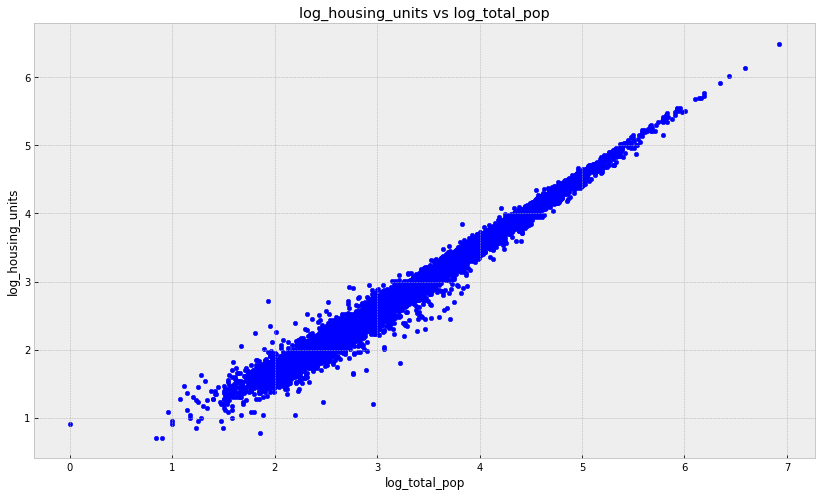

In [33]:
linreg(X=res_com_ind_log['log_total_pop'], Y=res_com_ind_log['log_housing_units'])
plot_scatter(df=res_com_ind_log, predictor='log_total_pop', predicted='log_housing_units')

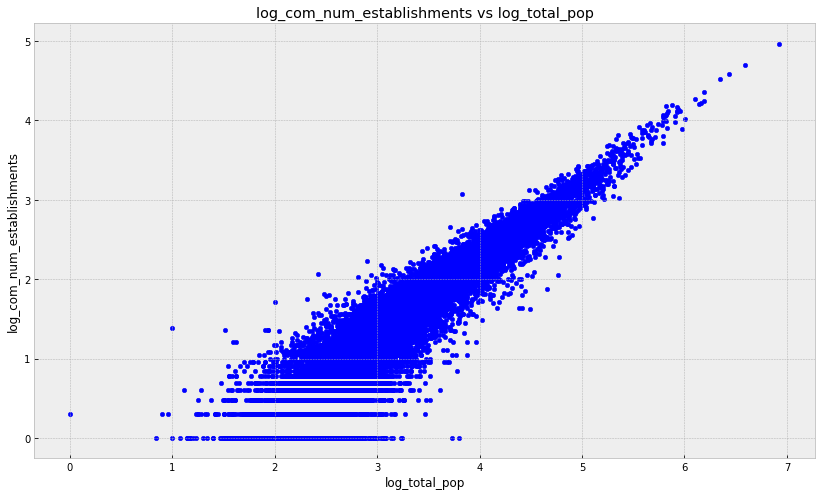

In [34]:
linreg(X=res_com_ind_log['log_total_pop'], Y=res_com_ind_log['log_com_num_establishments'])
plot_scatter(df=res_com_ind_log, predictor='log_total_pop', predicted='log_com_num_establishments')

In [29]:
linreg(X=res_com_ind_log['log_total_pop'], Y=res_com_ind_log['log_ind_elec_mwh'])

(1.006160738549417,
 0.0019212287980696907,
 0.502200690928361,
 5.619257040147522e-05,
 0.0006614607235663588)

In [30]:
linreg(X=res_com_ind_log['log_ind_num_establishments'], Y=res_com_ind_log['log_ind_elec_mwh'])

(1.1716600995844293,
 1.8823175274859303,
 0.5910895150882167,
 5.317964733813003e-05,
 0.00011164457534039925)

In [28]:
linreg(X=res_com_ind_log['log_total_pop'], Y=res_com_ind_log['log_ind_num_establishments'])

(0.7436183773865526,
 -1.2193823253947829,
 0.6370783196814036,
 1.7639549798003458e-05,
 0.00020764078399349869)

In [24]:
linreg(X=res_com_ind_log['log_total_pop'], Y=res_com_ind_log['log_res_elec_mwh'])

(0.9207533864684083,
 0.8978365586326658,
 0.9619323369824451,
 1.8787349850958861e-06,
 2.2115190562600287e-05)

In [25]:
linreg(X=res_com_ind_log['log_total_pop'], Y=res_com_ind_log['log_res_gas_mcf'])

(1.0681659115234126,
 0.7639412869079558,
 0.8001285416962718,
 1.596010074155835e-05,
 0.0001878714518534645)